In [1]:
import time
import csv
import pandas as pd
from scapy.all import *

In [ ]:
# Reference - https://github.com/fisher85/ml-cybersecurity/blob/master/python-web-attack-detection/web-attack-detection.ipynb

In [2]:
# Compiling classical ML models on the engineered CSV file named Wednesday-workingHours.csv

In [20]:
# Change this based on CSV file location
csv_file = 'C:/Users/sinja/OneDrive/Desktop/submit/Wednesday-workingHours.csv'

file = pd.read_csv(csv_file)
file = file[file[' Label'].isin(['BENIGN', 'DoS GoldenEye'])]

print(file)

         Destination Port   Flow Duration   Total Fwd Packets  \
0                      80           38308                   1   
1                     389             479                  11   
2                      88            1095                  10   
3                     389           15206                  17   
4                      88            1092                   9   
...                   ...             ...                 ...   
692698                 53           32215                   4   
692699                 53             324                   2   
692700              58030              82                   2   
692701                 53         1048635                   6   
692702                 53           94939                   4   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             1                            6   
1                             5                          172   
2                          

In [26]:
benign = file[file[' Label'] == 'BENIGN']
dos_goldeneye = file[file[' Label'] == 'DoS GoldenEye']

# Change this based on the desired Benign to DoS GoldenEye ratio
ratio = 2.0

benign_to_sample = int(len(dos_goldeneye) * ratio)
benign_sampled = benign.sample(n = benign_to_sample)

file = pd.concat([benign_sampled, dos_goldeneye])

print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file[' Label'].value_counts())

File columns:
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Lengt

In [27]:
import numpy as np

# Replacing non-numerical values
file.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinite values with -1
file.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Performing one-hot encoding for string columns
string_features = list(file.select_dtypes(include = ['object']).columns)
string_features.remove(' Label')
file = pd.get_dummies(file, columns = string_features, drop_first = True)

In [28]:
# Extracting 'Label' as 'y'
y = file[' Label'].values

# Extracting remaining columns as 'x'
x = file.drop(columns = [' Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'DoS GoldenEye' 'DoS GoldenEye'
 'DoS GoldenEye']

X Values:
         Destination Port   Flow Duration   Total Fwd Packets  \
468351                443       118518088                  22   
451704                443             178                   2   
2899                   53           64380                   1   
596333              56747              97                   1   
18294                  80         5587572                   4   
...                   ...             ...                 ...   
692606                 80        11512204                   8   
692613                 80        11513325                   5   
692652                 80        11509201                   7   
692681                 80        11509095                   8   
692696                 80        11512230                   5   

         Total Backward Packets  Total Length of Fwd Packets  \
468351                       24    

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'DoS GoldenEye' 'DoS GoldenEye'
 'DoS GoldenEye']

X Values:
[[6.85365967e-03 9.87655079e-01 1.72294969e-04 ... 1.80630381e-03
  4.90833333e-01 4.89166667e-01]
 [6.85365967e-03 1.48333986e-06 8.20452233e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.19963798e-04 5.36502361e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.23768120e-03 9.59104303e-02 4.92271340e-05 ... 0.00000000e+00
  5.41937333e-02 5.41937333e-02]
 [1.23768120e-03 9.59095470e-02 5.74316563e-05 ... 0.00000000e+00
  5.42079500e-02 5.42079500e-02]
 [1.23768120e-03 9.59356721e-02 3.28180893e-05 ... 0.00000000e+00
  5.42184417e-02 5.42184417e-02]]


In [30]:
# Splitting the dataset by Train-Test Split (70% train set and 30% test set)

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print("Y Train:")
print(y_train)
print("\nX Train:")
print(x_train)

print("\nY Test:")
print(y_test)
print("\nX Test:")
print(x_test)

# Converting to Pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("\nY Train value counts:")
print(y_train_series.value_counts())
print("\nY Test value counts:")
print(y_test_series.value_counts())

Y Train:
['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'DoS GoldenEye']

X Train:
[[8.19963798e-04 1.69949081e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.85365967e-03 4.38367429e-02 6.56361787e-05 ... 0.00000000e+00
  4.27453750e-02 4.27453750e-02]
 [8.72627133e-01 7.03962706e-01 4.92271340e-05 ... 0.00000000e+00
  7.01666667e-01 7.01666667e-01]
 ...
 [1.23768120e-03 5.63569146e-04 2.46135670e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23768120e-03 4.18591325e-01 5.74316563e-05 ... 5.01995499e-03
  8.50000000e-02 7.77722750e-02]
 [1.23768120e-03 6.49486349e-01 8.20452233e-06 ... 0.00000000e+00
  6.49166667e-01 6.49166667e-01]]

Y Test:
['BENIGN' 'BENIGN' 'DoS GoldenEye' ... 'BENIGN' 'BENIGN' 'DoS GoldenEye']

X Test:
[[6.85365967e-03 9.80863632e-01 2.37931148e-04 ... 1.83884299e-02
  8.33333333e-02 4.24140167e-02]
 [8.19963798e-04 2.19167631e-06 8.20452233e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23768120e-03 8.40446

In [33]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

import seaborn as sn 

Time consumed to fit model is  552.2011964321136
The best parameter is:
{'max_features': 1, 'n_estimators': 20}
               precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      6168
DoS GoldenEye       1.00      1.00      1.00      3096

     accuracy                           1.00      9264
    macro avg       1.00      1.00      1.00      9264
 weighted avg       1.00      1.00      1.00      9264



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

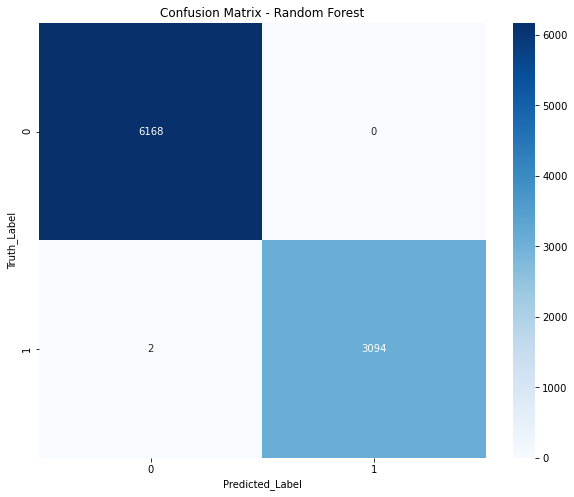

In [34]:
# Random Forest 

# Reference - https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Defining parameter range
param_grid = dict(max_features = np.arange(1, 4, 1), n_estimators = np.arange(10, 200, 10))

# Parameter Description
# max_features = number of features to consider when looking for the best split
# n_estimators = number of trees in the forest

grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the test set
grid_predictions = grid.predict(x_test)

print(classification_report(y_test.ravel(), grid_predictions))

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test.ravel(), grid_predictions)
plt.figure(figsize = (10,8))
sn.heatmap(conf_matrix, annot = True, cmap = 'Blues',  fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random Forest')

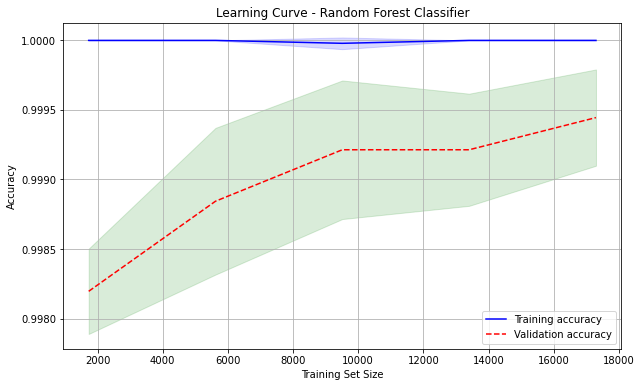

In [35]:
# Random Forest Learning Curve

# Fitting the Random Forest classifier with the best parameters
best_params = grid.best_params_

optimised_rfc = RandomForestClassifier(max_features = best_params['max_features'], 
                                       n_estimators = best_params['n_estimators'])

optimised_rfc.fit(x_train, y_train.ravel())

# Calculating the learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator = optimised_rfc, 
                                                        X = x_train, y = y_train.ravel(), cv = 5)

# Calculating mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Plotting the learning curve
plt.figure(figsize = (10, 6))
plt.plot(train_sizes, train_mean, color = "blue", label = 'Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'red', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.title('Learning Curve - Random Forest Classifier')
plt.show()

Time consumed to fit model is  1347.6905159950256
The best parameter is:
{'C': 10, 'gamma': 1, 'kernel': 'poly'}
               precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      6168
DoS GoldenEye       1.00      0.99      0.99      3096

     accuracy                           1.00      9264
    macro avg       1.00      1.00      1.00      9264
 weighted avg       1.00      1.00      1.00      9264



Text(0.5, 1.0, 'Confusion Matrix - SVM')

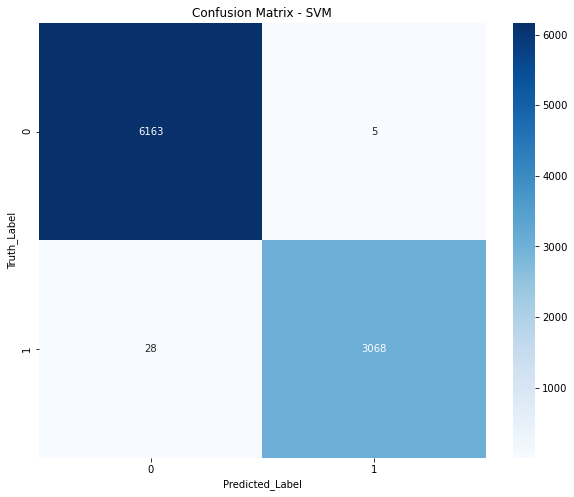

In [36]:
# SVM

# Reference - https://medium.com/swlh/hyperparameter-tuning-of-support-vector-machine-using-gridsearchcv-4d17671d1ed2

from sklearn.svm import SVC

svc = SVC()

# Defining parameter range
param_grid = {'C': [0.1, 1, 10],            
              'gamma': [0.01, 0.1, 1],       
              'kernel': ['rbf', 'poly'],
             }

# Parameter Description
# C = governs the balance between maximizing the margin and minimizing classification errors
# gamma = influences the shape of the decision boundary

grid = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the test set
grid_predictions = grid.predict(x_test)

print(classification_report(y_test.ravel(), grid_predictions))

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test.ravel(), grid_predictions)
plt.figure(figsize = (10, 8))
sn.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - SVM')

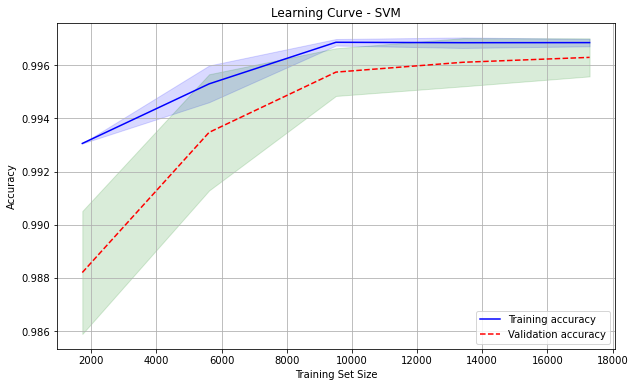

In [37]:
# SVM Learning Curve

optimised_svc = grid.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(estimator = optimised_svc, 
                                                        X = x_train, y = y_train.ravel(), cv = 5)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (10, 6))
plt.plot(train_sizes, train_mean, color = "blue", label = 'Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'red', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.title('Learning Curve - SVM')
plt.show()

Time consumed to fit model is  1040.167680978775
Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1}
               precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      6168
DoS GoldenEye       1.00      1.00      1.00      3096

     accuracy                           1.00      9264
    macro avg       1.00      1.00      1.00      9264
 weighted avg       1.00      1.00      1.00      9264



Text(0.5, 1.0, 'Confusion Matrix - Vanilla Neural Network')

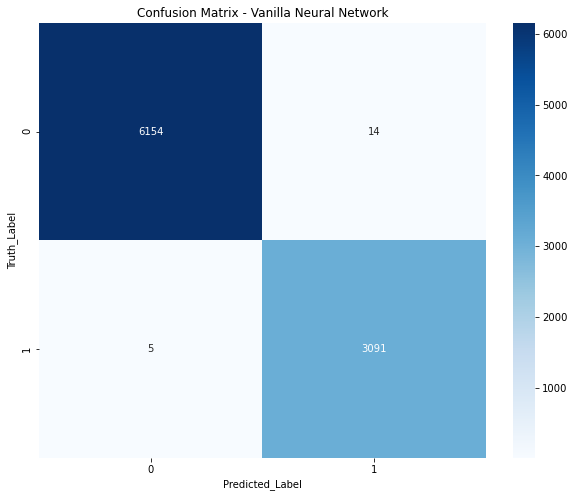

In [38]:
# Vanilla Neural Network 

# Reference - https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()

# Defining parameter range
param_grid_2 = {'learning_rate': ['constant','adaptive'], 
                'learning_rate_init': [0.1, 0.5, 1],
                'hidden_layer_sizes': [(100,), (200,), (300,), (400,)],
                'activation': ['relu']}

# Parameter Description
# learning_rate = schedule for weight updates
# learning_rate_init = the initial learning rate used
#                      controls the step-size in updating the weights
#                      only used when solver is ’sgd’ or ‘adam’
# hidden_layer_sizes = the ith element represents the number of neurons in the ith hidden layer
# activation = activation function for the hidden layer

mlp = GridSearchCV(estimator = mlpc, param_grid = param_grid_2, cv = 5)

start_2 = time.time()

# Fitting the model for grid search
mlp.fit(x_train, y_train.ravel())

end_2 = time.time()

print("Time consumed to fit model is ", end_2 - start_2)

print('Best parameters found:\n', mlp.best_params_)

# Predictions on the test set
mlp_predictions = mlp.predict(x_test)

print(classification_report(y_test.ravel(), mlp_predictions))

# Plotting the Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test.ravel(), mlp_predictions)
plt.figure(figsize = (10,8))
sn.heatmap(conf_matrix_2, annot = True, cmap = 'Blues',  fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Vanilla Neural Network')

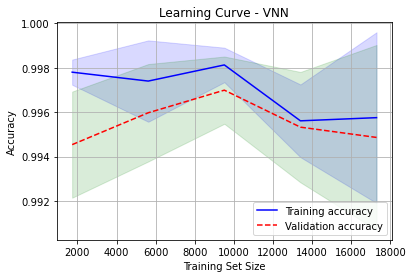

In [39]:
# VNN Learning Curve

optimised_mlp = mlp.best_estimator_
optimised_mlp.fit(x_train, y_train.ravel())

train_sizes, train_scores, test_scores = learning_curve(estimator = optimised_mlp, 
                                                        X = x_train, y = y_train.ravel(), cv =  5)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = "blue", label = 'Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'red', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.title('Learning Curve - VNN')
plt.show()

In [3]:
# Compiling DL models on a CSV file that combines PCAP data from Wednesday-WorkingHours.pcap
# with attack labels from an engineered CSV file named Wednesday-workingHours.csv

In [1]:
# Change this based on PCAP and CSV file location
pcap_file = 'C:/Users/sinja/Desktop/submit/100k_records.pcapng'  
csv_file = 'C:/Users/sinja/Desktop/submit/Wednesday-workingHours.csv'

# Storing data from CSV file in a dictionary
data = {}

with open(csv_file, 'r') as file:
    read = csv.DictReader(file)
    for row in read:
        key = (row[' Destination Port'])
        data[key] = row[' Label']

# Storing dataframes for each data type in a dictionary
dataframe = {}

def extract_features(packet):
    timestamp = packet.time
    
    # IP-related variables
    source_ip = None
    destination_ip = None
    src_port = None
    dst_port = None
    
    # Checking for the presence of an IP packet
    if IP in packet:
        source_ip = packet[IP].src
        destination_ip = packet[IP].dst
    
    # Checking for the presence of a TCP or UDP packet
    if TCP in packet:
        src_port = packet[TCP].sport
        dst_port = packet[TCP].dport 
    elif UDP in packet:
        src_port = packet[UDP].sport
        dst_port = packet[UDP].dport
    
    packet_length = len(packet)

    # Finding the data label based on the current packet attributes
    key = (str(dst_port))
    data_label = data.get(key, 'BENIGN')

    return [timestamp, source_ip, destination_ip, src_port, dst_port, packet_length, data_label]

for packet in PcapReader(pcap_file):
    features = extract_features(packet)
    data_label = features[-1] 
    
    if data_label not in dataframe:
        dataframe[data_label] = []

    dataframe[data_label].append(features)

# Creating seperate dataframes for each data type
for data_label, packets in dataframe.items():
    dataframe[data_label] = pd.DataFrame(packets, columns = ['Timestamp', 'Source_IP', 'Destination_IP', 'Source_Port', 
                                                             'Destination_Port', 'Packet_Length', 
                                                             'Attack_Label'])

# Combining all dataframes 
dataset = pd.concat(dataframe.values())

# Saving the combined dataset to a CSV file
dataset.to_csv('dataset.csv', index = False)

print('Combined dataset saved as dataset.csv')

Combined dataset saved as dataset.csv


In [2]:
file = pd.read_csv('dataset.csv')
print(file)

          Timestamp      Source_IP   Destination_IP  Source_Port  \
0      1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
1      1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
2      1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
3      1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
4      1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
...             ...            ...              ...          ...   
99995  1.499255e+09  192.168.10.14      13.107.4.50      49533.0   
99996  1.499255e+09  192.168.10.14      13.107.4.50      49533.0   
99997  1.499255e+09  192.168.10.14      13.107.4.50      49533.0   
99998  1.499255e+09  192.168.10.14      13.107.4.50      49533.0   
99999  1.499255e+09  192.168.10.14      13.107.4.50      49533.0   

       Destination_Port  Packet_Length   Attack_Label  
0                1900.0            179         BENIGN  
1                1900.0            179         BENIGN  
2              

In [3]:
print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file['Attack_Label'].value_counts())

File columns:
Index(['Timestamp', 'Source_IP', 'Destination_IP', 'Source_Port',
       'Destination_Port', 'Packet_Length', 'Attack_Label'],
      dtype='object')

Data value counts:
BENIGN           62706
DoS GoldenEye    37294
Name: Attack_Label, dtype: int64


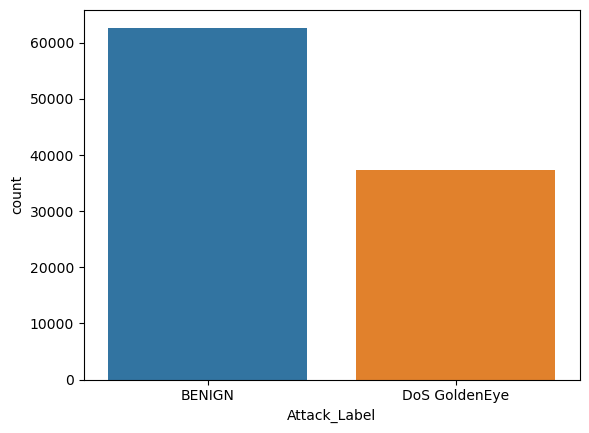

In [4]:
# Visualizing the 'Attack_Label' distribution 

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Attack_Label', data = file)
plt.show()

In [5]:
import numpy as np

# Replacing non-numerical values
file.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinite values with -1
file.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Performing one-hot encoding for string columns
string_features = list(file.select_dtypes(include = ['object']).columns)
string_features.remove('Attack_Label')
file = pd.get_dummies(file, columns = string_features, drop_first = True)

In [6]:
# Extracting 'Attack_Label' as 'y'
y = file['Attack_Label'].values

# Extracting remaining columns as 'x'
x = file.drop(columns = ['Attack_Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'DoS GoldenEye' 'DoS GoldenEye'
 'DoS GoldenEye']

X Values:
          Timestamp  Source_Port  Destination_Port  Packet_Length  \
0      1.499255e+09      49792.0            1900.0            179   
1      1.499255e+09      49792.0            1900.0            179   
2      1.499255e+09      49792.0            1900.0            179   
3      1.499255e+09      49792.0            1900.0            179   
4      1.499255e+09      49792.0            1900.0            179   
...             ...          ...               ...            ...   
99995  1.499255e+09      49533.0              80.0             66   
99996  1.499255e+09      49533.0              80.0             66   
99997  1.499255e+09      49533.0              80.0             66   
99998  1.499255e+09      49533.0              80.0             66   
99999  1.499255e+09      49533.0              80.0             66   

       Source_IP_104.131.53.252  Source_IP_104.88.3

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'DoS GoldenEye' 'DoS GoldenEye'
 'DoS GoldenEye']

X Values:
[[0.00000000e+00 7.61931723e-01 2.90890729e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.70083547e-08 7.61931723e-01 2.90890729e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.16649675e-08 7.61931723e-01 2.90890729e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99998775e-01 7.57968509e-01 1.23946076e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99999033e-01 7.57968509e-01 1.23946076e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.57968509e-01 1.23946076e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


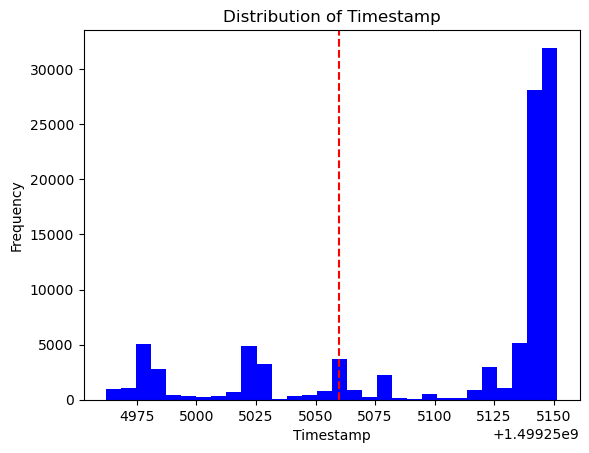

In [8]:
# Visualizing the 'Timestamp' distribution

plt.hist(file['Timestamp'], bins = 30, color = 'blue')
plt.axvline(x = 1499255060, color = 'red', linestyle = '--') # x = time threshold 

plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamp')
plt.show()

In [9]:
# Splitting the dataset by 'Timestamp' (Time-Based)

file.sort_values(by = 'Timestamp', inplace = True)

# Setting the time threshold
time_threshold = 1499255060    

# Splitting the dataset into training and testing sets based on the time threshold above
x_train = file[file['Timestamp'] < time_threshold].drop(columns = ['Timestamp', 'Attack_Label'])
y_train = file[file['Timestamp'] < time_threshold]['Attack_Label']
x_test = file[file['Timestamp'] >= time_threshold].drop(columns = ['Timestamp', 'Attack_Label'])
y_test = file[file['Timestamp'] >= time_threshold]['Attack_Label']

# Fitting and transforming the features for both training and testing sets
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Y Train:")
print(y_train)
print("\nX Train:")
print(x_train)

print("\nY Test:")
print(y_test)
print("\nX Test:")
print(x_test)

print("\nY Train value counts:")
print(y_train.value_counts())
print("\nY Test value counts:")
print(y_test.value_counts())

Y Train:
0               BENIGN
1               BENIGN
2               BENIGN
3               BENIGN
4               BENIGN
             ...      
70224    DoS GoldenEye
17414           BENIGN
70225    DoS GoldenEye
17415           BENIGN
17416           BENIGN
Name: Attack_Label, Length: 24937, dtype: object

X Train:
[[7.61931723e-01 2.90890729e-02 4.79567986e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.61931723e-01 2.90890729e-02 4.79567986e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.61931723e-01 2.90890729e-02 4.79567986e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.78858778e-01 1.23946076e-03 2.41798984e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23946076e-03 5.78858778e-01 1.16950109e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23946076e-03 5.78858778e-01 5.85959539e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Y Test:
17417           BENIGN
70226    DoS GoldenEye
17418           BENIGN
7

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

In [12]:
# Defining the fixed sequence length
sequence_length = 10

# Reshaping the data into sequences with the specified sequence length
def create_sequences(data, labels, sequence_length):
    num_sequences = len(data) - sequence_length + 1
    x_sequences, y_sequences = [], []

    for i in range(num_sequences):
        x_sequences.append(data[i: i + sequence_length])
        y_sequences.append(labels.iloc[i + sequence_length - 1])

    return np.array(x_sequences), np.array(y_sequences)

Epoch 1/10
779/779 [==============================] - 17s 18ms/step - loss: 0.0901 - accuracy: 0.9663 - val_loss: 0.0440 - val_accuracy: 0.9743
Epoch 2/10
779/779 [==============================] - 13s 16ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0654 - val_accuracy: 0.9700
Epoch 3/10
779/779 [==============================] - 12s 16ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0645 - val_accuracy: 0.9678
Epoch 4/10
779/779 [==============================] - 12s 15ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0741 - val_accuracy: 0.9675
Epoch 5/10
779/779 [==============================] - 12s 16ms/step - loss: 9.8101e-04 - accuracy: 0.9998 - val_loss: 0.0742 - val_accuracy: 0.9675
Epoch 6/10
779/779 [==============================] - 12s 16ms/step - loss: 7.8290e-04 - accuracy: 0.9998 - val_loss: 0.0796 - val_accuracy: 0.9667
Epoch 7/10
779/779 [==============================] - 13s 16ms/step - loss: 7.1654e-04 - accuracy: 0.9998 - val_loss: 0.0972 - v

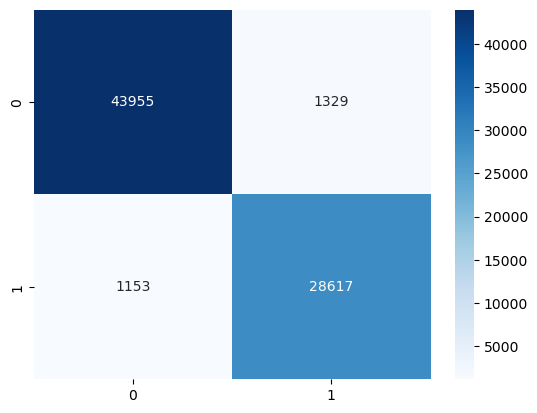

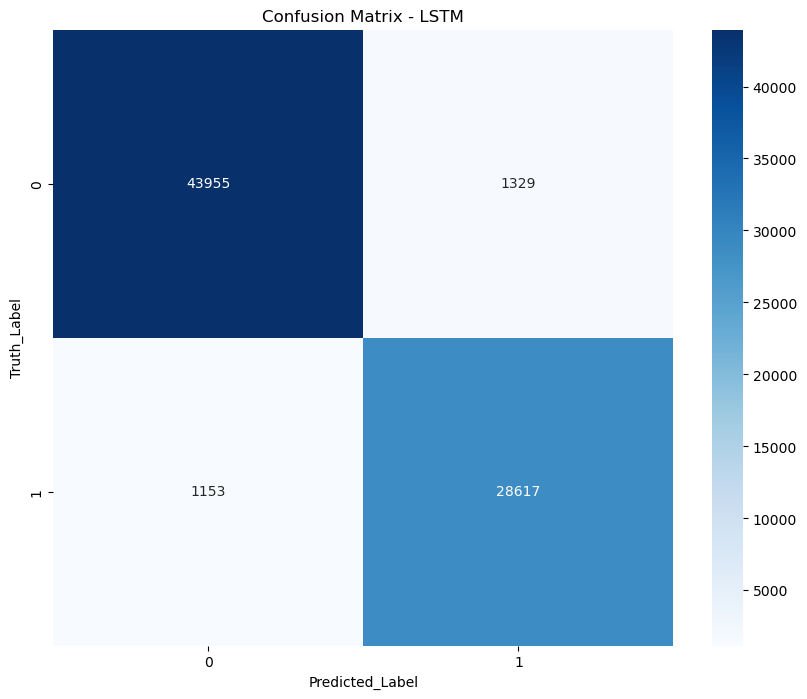

In [42]:
# Long Short-Term Memory

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model
model = Sequential()
model.add(LSTM(units = 50, input_shape = (sequence_length, x_train.shape[2])))
model.add(Dense(units = num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

# Training the model
history = model.fit(x_train, y_train_encoded, epochs = 10, batch_size = 32, validation_data = (x_test, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - LSTM')
plt.show()

Epoch 1/10
779/779 [==============================] - 9s 10ms/step - loss: 0.0630 - accuracy: 0.9826 - val_loss: 0.0570 - val_accuracy: 0.9797
Epoch 2/10
779/779 [==============================] - 7s 9ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0708 - val_accuracy: 0.9692
Epoch 3/10
779/779 [==============================] - 7s 9ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0714 - val_accuracy: 0.9720
Epoch 4/10
779/779 [==============================] - 6s 8ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0634 - val_accuracy: 0.9685
Epoch 5/10
779/779 [==============================] - 6s 8ms/step - loss: 9.4281e-04 - accuracy: 0.9996 - val_loss: 0.0546 - val_accuracy: 0.9722
Epoch 6/10
779/779 [==============================] - 6s 8ms/step - loss: 7.1269e-04 - accuracy: 0.9999 - val_loss: 0.0655 - val_accuracy: 0.9699
Epoch 7/10
779/779 [==============================] - 6s 8ms/step - loss: 6.2408e-04 - accuracy: 0.9998 - val_loss: 0.0683 - val_accuracy: 

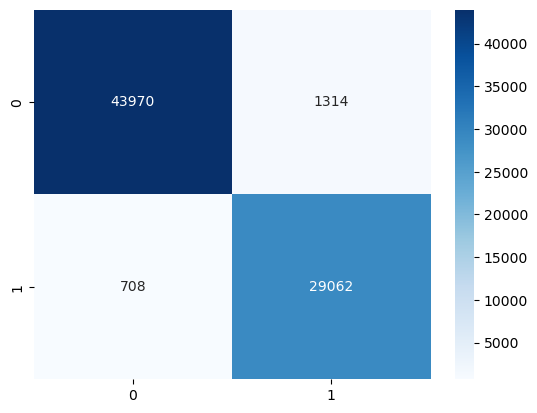

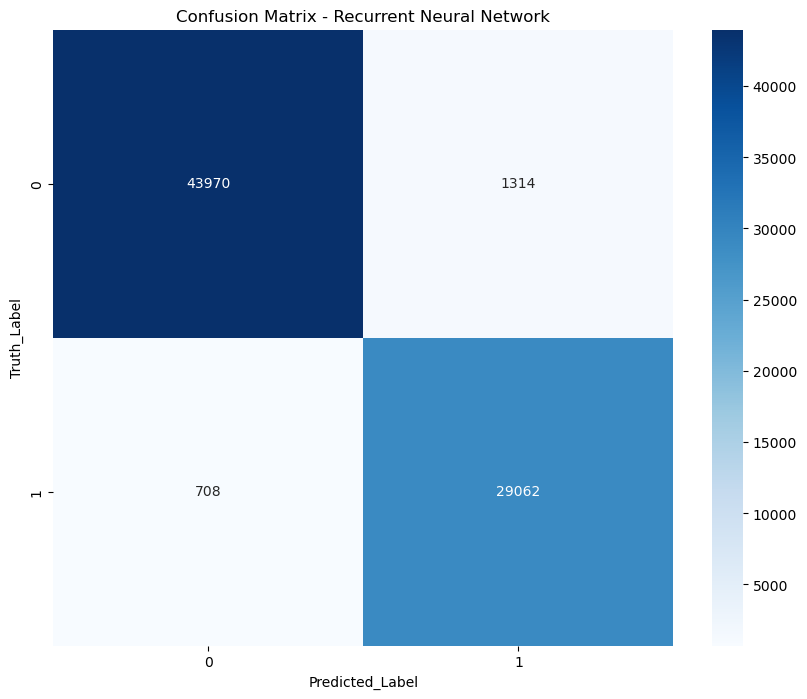

In [57]:
# Recurrent Neural Network

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape = (sequence_length, x_train.shape[2])))
model.add(Dense(units = num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

# Training the model
history = model.fit(x_train, y_train_encoded, epochs = 10, batch_size = 32, validation_data = (x_test, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)

plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Recurrent Neural Network')
plt.show()

Epoch 1/10
779/779 [==============================] - 7s 7ms/step - loss: 0.1321 - accuracy: 0.9511 - val_loss: 0.0780 - val_accuracy: 0.9711
Epoch 2/10
779/779 [==============================] - 4s 5ms/step - loss: 0.0292 - accuracy: 0.9900 - val_loss: 0.0685 - val_accuracy: 0.9711
Epoch 3/10
779/779 [==============================] - 4s 5ms/step - loss: 0.0201 - accuracy: 0.9924 - val_loss: 0.0798 - val_accuracy: 0.9729
Epoch 4/10
779/779 [==============================] - 4s 5ms/step - loss: 0.0178 - accuracy: 0.9934 - val_loss: 0.0717 - val_accuracy: 0.9724
Epoch 5/10
779/779 [==============================] - 4s 6ms/step - loss: 0.0154 - accuracy: 0.9936 - val_loss: 0.0686 - val_accuracy: 0.9765
Epoch 6/10
779/779 [==============================] - 4s 5ms/step - loss: 0.0131 - accuracy: 0.9947 - val_loss: 0.0851 - val_accuracy: 0.9638
Epoch 7/10
779/779 [==============================] - 4s 5ms/step - loss: 0.0119 - accuracy: 0.9945 - val_loss: 0.0738 - val_accuracy: 0.9732
Epoch 

Text(0.5, 1.0, 'Confusion Matrix - Convolutional Neural Network')

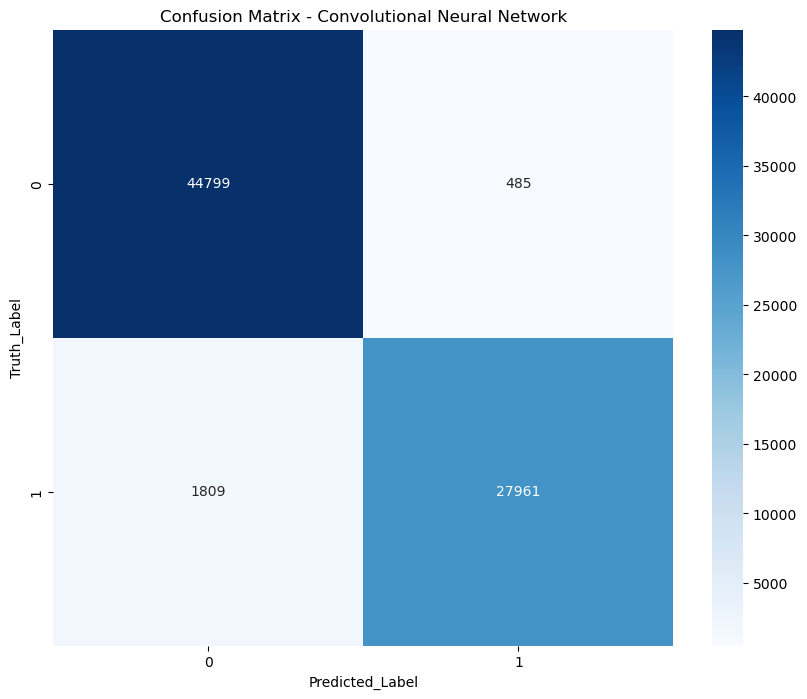

In [13]:
# Convolutional Neural Network - 1D

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

num_features = x_train.shape[-1]

# Reshaping the data 
x_train_cnn = x_train.reshape(-1, sequence_length, num_features)
x_test_cnn = x_test.reshape(-1, sequence_length, num_features)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model
model = Sequential()
model.add(Conv1D(32, kernel_size = 3, activation = 'relu', input_shape = (sequence_length, num_features)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

history = model.fit(x_train_cnn, y_train_encoded, epochs = 10, batch_size = 32, 
                    validation_data = (x_test_cnn, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Convolutional Neural Network')

Epoch 1/10
779/779 [==============================] - 6s 7ms/step - loss: 0.1358 - accuracy: 0.9497 - val_loss: 0.0836 - val_accuracy: 0.9685
Epoch 2/10
779/779 [==============================] - 4s 5ms/step - loss: 0.0304 - accuracy: 0.9894 - val_loss: 0.0635 - val_accuracy: 0.9826
Epoch 3/10
779/779 [==============================] - 4s 6ms/step - loss: 0.0211 - accuracy: 0.9925 - val_loss: 0.0697 - val_accuracy: 0.9811
Epoch 4/10
779/779 [==============================] - 4s 5ms/step - loss: 0.0154 - accuracy: 0.9938 - val_loss: 0.0673 - val_accuracy: 0.9723
Epoch 5/10
779/779 [==============================] - 4s 5ms/step - loss: 0.0149 - accuracy: 0.9940 - val_loss: 0.1037 - val_accuracy: 0.9693
Epoch 6/10
779/779 [==============================] - 4s 6ms/step - loss: 0.0135 - accuracy: 0.9945 - val_loss: 0.0516 - val_accuracy: 0.9803
Epoch 7/10
779/779 [==============================] - 4s 6ms/step - loss: 0.0123 - accuracy: 0.9945 - val_loss: 0.0513 - val_accuracy: 0.9797
Epoch 

Text(0.5, 1.0, 'Confusion Matrix - Convolutional Neural Network')

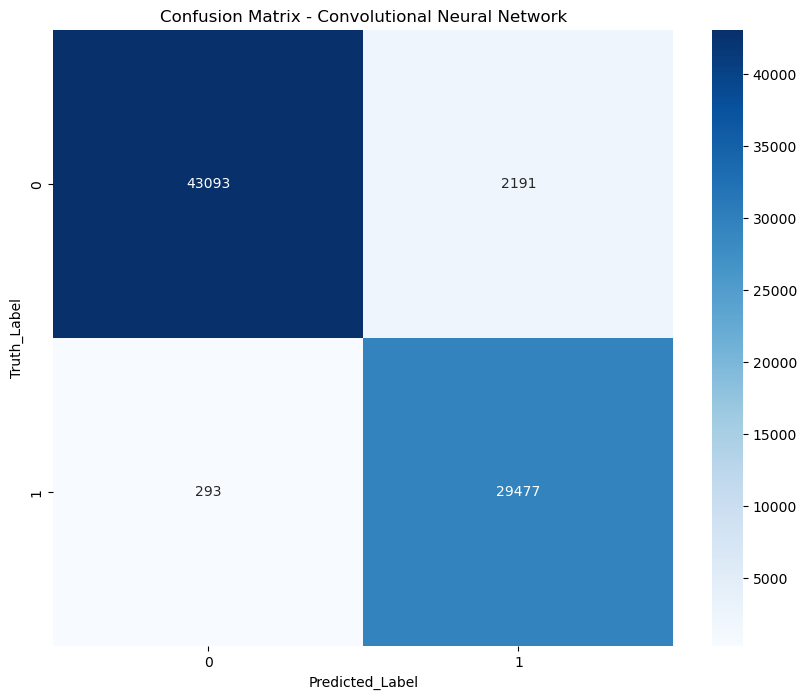

In [12]:
# Convolutional Neural Network - 2D

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

num_features = x_train.shape[-1]

# Reshaping the data 
x_train_cnn = x_train.reshape(-1, 1, sequence_length, num_features)
x_test_cnn = x_test.reshape(-1, 1, sequence_length, num_features)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model
model = Sequential()
model.add(Conv2D(32, kernel_size = (1, 3), activation = 'relu', input_shape = (1, sequence_length, num_features)))
model.add(MaxPooling2D(pool_size = (1, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

history = model.fit(x_train_cnn, y_train_encoded, epochs = 10, batch_size = 32, 
                    validation_data = (x_test_cnn, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Convolutional Neural Network')